## Comparing the PIR and [HARK](https://econ-ark.org) solution

- this notebook compare my code and HARK solutions 
- author: Tao Wang
- created in Feb 2022
- modified in Jul 2024
- this is a companion notebook to the paper "Perceived income risks"

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from time import time
from copy import copy

In [2]:
## plot configuration 

plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

In [3]:
from SolveLifeCycleBelief import LifeCycle, solve_model_iter
from PrepareParameters import life_cycle_paras_y 

/Users/tao/opt/anaconda3/envs/econ-ark/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/tao/opt/anaconda3/envs/econ-ark/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### parameters 

In [4]:
inf_paras = copy(life_cycle_paras_y)
inf_paras['G'] =  np.ones_like(inf_paras['G'])
inf_paras['unemp_insurance'] = 0.0
inf_paras['P'] = np.array([[0.9,0.1],[0.2,0.8]])
inf_paras['λ_SS'] = 0.0 

In [20]:
inf_mkv_paras_dict = { 'U':inf_paras['U'], ## transitory ue risk
                    'unemp_insurance':inf_paras['unemp_insurance'],
                    'pension':inf_paras['pension'], ## pension
                    'sigma_psi':inf_paras['σ_ψ'], # permanent 
                    'sigma_eps':inf_paras['σ_θ'], # transitory 
                    'P':inf_paras['P'],   ## transitory probability of markov state z
                    'z_val':inf_paras['z_val'], ## markov state from low to high  
                    'x': 0.0,           ## MA(1) coefficient of non-permanent inocme shocks
                    'ue_markov':True,   
                    'adjust_prob':1.0,
                    'sigma_p_init':inf_paras['σ_ψ_init'],
                    'init_b':inf_paras['init_b'],
                    ## subjective risk prifile 
                    'sigma_psi_2mkv':inf_paras['σ_ψ_2mkv'],  ## permanent risks in 2 markov states
                    'sigma_eps_2mkv':inf_paras['σ_θ_2mkv'],  ## transitory risks in 2 markov states
                    'λ':inf_paras['λ'],  ## tax rate
                    'λ_SS':inf_paras['λ_SS'], ## social tax rate
                    'transfer':inf_paras['transfer'],  ## transfer 
                    'bequest_ratio':inf_paras['bequest_ratio'],
                    'LivPrb':inf_paras['LivPrb'],       ## living probability 
                    ## life cycle 
                    'T': inf_paras['T'],
                    'L': inf_paras['L'],
                    'G':inf_paras['G'],
                    ## other parameters 
                    'ρ':inf_paras['ρ'],     ## relative risk aversion  
                    'β': inf_paras['β'],    ## discount factor
                    'R':inf_paras['R'],           ## interest factor 
                    'W':inf_paras['W'],            ## Wage rate
                    ## subjective models 
                    'theta':0.0, ## extrapolation parameter 
                    ## no persistent state
                    'b_y': 0.0,
                    ## wether to have zero borrowing constraint 
                    'borrowing_cstr':True,
                    ## a grids 
                    'grid_max': 20.0,
                    'grid_size': 500}


inf_mkv = LifeCycle(**inf_mkv_paras_dict)

Error at iteration 50 is 0.7373047035579106.
Error at iteration 100 is 0.1303401445304928.
Error at iteration 150 is 0.03426971121601241.
Error at iteration 200 is 0.009927023531737689.
Error at iteration 250 is 0.0029563568758845804.
Error at iteration 300 is 0.0008877192614704654.
Error at iteration 350 is 0.0002672216280288353.
Error at iteration 400 is 8.049933826725919e-05.
Error at iteration 450 is 2.425553920204493e-05.
Error at iteration 500 is 7.30901882661783e-06.
Error at iteration 550 is 2.2025010721904437e-06.

Converged in 583 iterations.
Time taken, in seconds: 82.66089701652527


Text(0.5, 1.0, 'Inifite horizon solution')

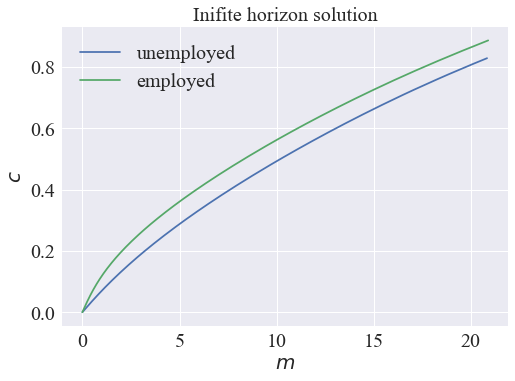

In [21]:
## initial consumption functions 


t_start = time()

a_init,σ_init = inf_mkv.terminal_solution()

a_inf_star, σ_inf_star = solve_model_iter(inf_mkv,
                                          a_init,
                                          σ_init)
t_finish = time()

print("Time taken, in seconds: "+ str(t_finish - t_start))   

## plot c func 
z_l = 0
z_h = 1

m_plt_u, c_plt_u = a_inf_star[:-1,0,z_l,0],σ_inf_star[:-1,0,z_l,0] 
m_plt_e, c_plt_e = a_inf_star[:-1,0,z_h,0], σ_inf_star[:-1,0,z_h,0]
plt.plot(m_plt_u,
         c_plt_u,
         label = 'unemployed',
        )
plt.plot(m_plt_e,
         c_plt_e,
         label = 'employed',
        )
plt.legend()
plt.xlabel(r'$m$')
plt.ylabel(r'$c$')
plt.title('Inifite horizon solution')

## Solving the same model with HARK


In [22]:
from HARK.ConsumptionSaving.ConsMarkovModel import MarkovConsumerType
from HARK.distribution import DiscreteDistribution
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle
from HARK.ConsumptionSaving.ConsIndShockModel import init_idiosyncratic_shocks
from HARK.utilities import plot_funcs

In [23]:
## for infinite horizon 
hark_mkv_para = copy(init_idiosyncratic_shocks)
hark_mkv_para["MrkvArray"] = [inf_paras['P']]
hark_mkv_para["UnempPrb"] = inf_paras['U']  # to make income distribution when employed
hark_mkv_para['IncUnemp'] = inf_paras['unemp_insurance']
hark_mkv_para["global_markov"] = False
hark_mkv_para['CRRA'] = inf_paras['ρ']
hark_mkv_para['Rfree'] = inf_paras['R']
hark_mkv_para['LivPrb'] = [inf_paras['LivPrb'][0]] ## constant liv prob 
hark_mkv_para['PermGroFac'] = [1.0]
hark_mkv_para['PermShkStd'] = [inf_paras['σ_ψ']]
hark_mkv_para['TranShkStd'] = [inf_paras['σ_θ']]
hark_mkv_para['DiscFac'] = inf_paras['β']
hark_mkv_para['aXtraMax'] = inf_mkv_paras_dict['grid_max']
hark_mkv_para['aXtraCount'] = inf_mkv_paras_dict['grid_size']-1

In [24]:
print('HARK parameterization',str(hark_mkv_para))
print('PIR parameterization',str(inf_mkv_paras_dict))

HARK parameterization {'cycles': 1, 'CRRA': 2.0, 'Rfree': 1.01, 'DiscFac': 0.97, 'LivPrb': [0.994], 'PermGroFac': [1.0], 'BoroCnstArt': 0.0, 'MaxKinks': 400, 'AgentCount': 10000, 'aNrmInitMean': 0.0, 'aNrmInitStd': 1.0, 'pLvlInitMean': 0.0, 'pLvlInitStd': 0.0, 'PermGroFacAgg': 1.0, 'T_age': None, 'T_cycle': 1, 'PerfMITShk': False, 'aXtraMin': 0.001, 'aXtraMax': 20.0, 'aXtraNestFac': 3, 'aXtraCount': 499, 'aXtraExtra': [None], 'PermShkStd': [0.15], 'PermShkCount': 7, 'TranShkStd': [0.15], 'TranShkCount': 7, 'UnempPrb': 0.0, 'UnempPrbRet': 0.005, 'IncUnemp': 0.0, 'IncUnempRet': 0.0, 'tax_rate': 0.0, 'T_retire': 0, 'vFuncBool': False, 'CubicBool': False, 'neutral_measure': False, 'MrkvArray': [array([[0.9, 0.1],
       [0.2, 0.8]])], 'global_markov': False}
PIR parameterization {'U': 0.0, 'unemp_insurance': 0.0, 'pension': 0.65, 'sigma_psi': 0.15, 'sigma_eps': 0.15, 'P': array([[0.9, 0.1],
       [0.2, 0.8]]), 'z_val': array([0., 1.]), 'x': 0.0, 'ue_markov': True, 'adjust_prob': 1.0, 'sig

In [25]:
hark_mkv = MarkovConsumerType(**hark_mkv_para)
hark_mkv.cycles = 0 ## infinite horizon
hark_mkv.vFuncBool = False  # for easy toggling here

In [26]:
hark_mkv.LivPrb

[0.994]

In [27]:
# Interest factor, permanent growth rates, and survival probabilities are constant arrays
hark_mkv.assign_parameters(Rfree = np.array(2 * [hark_mkv.Rfree]))
hark_mkv.PermGroFac = [
    np.array(2 * hark_mkv.PermGroFac)
]
hark_mkv.LivPrb = [
    np.array(2 * hark_mkv.LivPrb)
]


In [28]:
#Replace the default (lognormal) income distribution with a custom one
employed_income_dist = DiscreteDistribution(np.ones(1), [np.ones(1), np.ones(1)])  # Definitely get income
unemployed_income_dist = DiscreteDistribution(np.ones(1), [np.ones(1), np.zeros(1)]) # Definitely don't
hark_mkv.IncShkDstn = [
    [
        unemployed_income_dist,
        employed_income_dist
    ]
]

Solving a Markov consumer with serially correlated unemployment took 0.27245187759399414 seconds.
Consumption functions for each discrete state:


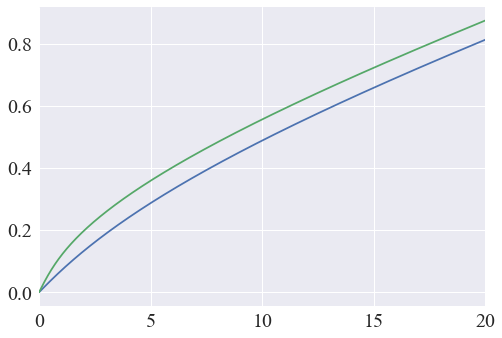

In [29]:
## solve the model 

start_time = time()
hark_mkv.solve()
end_time = time()
print(
    "Solving a Markov consumer with serially correlated unemployment took "
    + str(end_time - start_time)
    + " seconds."
)
print("Consumption functions for each discrete state:")
plot_funcs(hark_mkv.solution[0].cFunc, 0, 20)
if hark_mkv.vFuncBool:
    print("Value functions for each discrete state:")
    plot_funcs(hark_mkv.solution[0].vFunc, 5, 20)

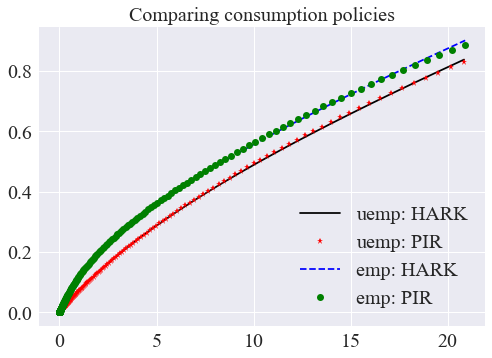

In [30]:
## compare the solutions 

## get the HARK c  
c_u_HARK = hark_mkv.solution[0].cFunc[0](m_plt_u)
c_e_HARK = hark_mkv.solution[0].cFunc[1](m_plt_e)

plt.title('Comparing consumption policies')
plt.plot(m_plt_u,c_u_HARK,'k-',label='uemp: HARK')
plt.plot(m_plt_u,c_plt_u,'r*',label='uemp: PIR')
plt.plot(m_plt_e,c_e_HARK,'b--',label='emp: HARK')
plt.plot(m_plt_e,c_plt_e,'go',label='emp: PIR')
plt.legend(loc=0)

### Simulation 

In [31]:
hark_mkv.unpack('cFunc')                      # Expose the consumption rules

# Which variables do we want to track
hark_mkv.track_vars = ['aNrm','pLvl','mNrm','cNrm']

hark_mkv.T_sim =120     
hark_mkv.MrkvPrbsInit = [0.5, 0.5]
hark_mkv.make_shock_history()                 # This is optional
hark_mkv.initialize_sim()                     # Construct the age-25 distribution of income and assets
hark_mkv.simulate()

{'aNrm': array([[ 7.90374335,  1.68195436,  2.15543302, ...,  2.80422941,
          1.54893038,  1.18137239],
        [ 7.57038975,  1.58415816,  2.90840614, ...,  2.65263944,
          2.33109333,  1.98311364],
        [ 7.24696177,  1.49143867,  2.75219026, ...,  2.50788189,
          3.07619115,  1.87010642],
        ...,
        [ 2.48916836,  3.59175947,  4.449955  , ...,  0.58087437,
          2.67586023, 10.49290737],
        [ 2.35191921,  3.40649615,  4.23097347, ...,  0.54458136,
          2.53004817, 10.08800815],
        [ 2.22109147,  3.22889791,  4.02033552, ...,  0.51048651,
          2.39090705, 10.59110502]]),
 'pLvl': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'mNrm': array([[ 8.32959824,  1.87026607,  2.37724337, ...,  2.99246842,
          1.72703048,  1.32878605]

In [32]:
hark_mkv.shock_history['Mrkv'].shape

(120, 10000)

### Comparing consumption policies under different risks 
  - back to the infinite horizon for simplicity

[0.01]
[0.01]
Solving a Markov consumer with serially correlated unemployment took 0.418928861618042 seconds.
[0.05]
[0.05]
Solving a Markov consumer with serially correlated unemployment took 0.21165704727172852 seconds.
[0.1]
[0.1]
Solving a Markov consumer with serially correlated unemployment took 0.27309417724609375 seconds.
[0.2]
[0.2]
Solving a Markov consumer with serially correlated unemployment took 0.2137441635131836 seconds.


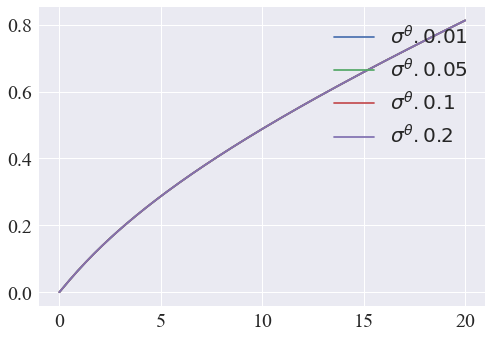

In [33]:
sigma_eps_ls = [0.01,0.05,0.1,0.2]
sigma_psi_ls = [0.01,0.05,0.1,0.2]

cFunc_list = []
for i,sigma_eps in enumerate(sigma_eps_ls):
    hark_mkv_para['TranShkStd'] = [sigma_eps]
    print(hark_mkv_para['TranShkStd'])
    hark_mkv_para['PermShkStd'] = [sigma_psi_ls[i]]
    print(hark_mkv_para['PermShkStd'])
    hark_mkv_new = MarkovConsumerType(**hark_mkv_para)
    hark_mkv_new.cycles = 0
    hark_mkv_new.vFuncBool = False  # for easy toggling here
    # Interest factor, permanent growth rates, and survival probabilities are constant arrays
    hark_mkv_new.assign_parameters(Rfree = np.array(2 * [hark_mkv_new.Rfree]))
    hark_mkv_new.PermGroFac = [
        np.array(2 * hark_mkv_new.PermGroFac)
    ]
    hark_mkv_new.LivPrb = [hark_mkv_new.LivPrb * np.ones(2)]
    # Replace the default (lognormal) income distribution with a custom one
    employed_income_dist = DiscreteDistribution(np.ones(1), [np.ones(1), np.ones(1)])  # Definitely get income
    unemployed_income_dist = DiscreteDistribution(np.ones(1), [np.ones(1), np.zeros(1)]) # Definitely don't
    hark_mkv_new.IncShkDstn = [
        [
            unemployed_income_dist,
            employed_income_dist
        ]
    ]
    ## solve the model 

    start_time = time()
    hark_mkv_new.solve()
    end_time = time()
    print(
        "Solving a Markov consumer with serially correlated unemployment took "
        + str(end_time - start_time)
        + " seconds."
    )
    
    #print("Consumption functions for each discrete state:")
    #plot_funcs(hark_mkv.solution[0].cFunc, 0, 20)
    cFunc_list.append(hark_mkv_new.solution[0].cFunc)
    
m_values = np.linspace(0.0,20.0,200)

for i,sigma_eps in enumerate(sigma_eps_ls):
    plt.plot(m_values,
             cFunc_list[i][0](m_values),
            label=r'$\sigma^\theta.{}$'.format(sigma_eps))
plt.legend(loc=1)

Solving a Markov consumer with serially correlated unemployment took 0.2890188694000244 seconds.
Solving a Markov consumer with serially correlated unemployment took 0.29482388496398926 seconds.
Solving a Markov consumer with serially correlated unemployment took 0.29698991775512695 seconds.
Solving a Markov consumer with serially correlated unemployment took 0.37444210052490234 seconds.


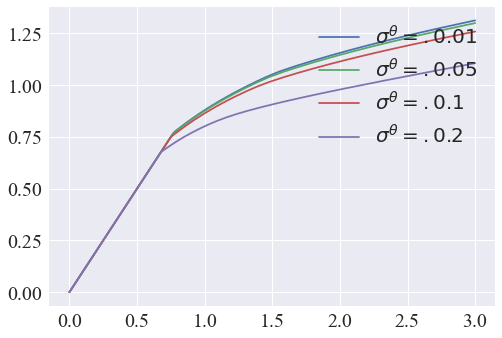

In [26]:
## for life cycle models 
import HARK.ConsumptionSaving.ConsIndShockModel as HARK_model         # The consumption-saving micro model

sigma_eps_ls = [0.01,0.05,0.1,0.2]
sigma_psi_ls = [0.01,0.05,0.1,0.2]

cFunc_list = []

for i,sigma_eps in enumerate(sigma_eps_ls):
    init_life_cycle_new = copy(init_lifecycle)
    lc_paras = copy(life_cycle_paras_y)
    #years_retire = lc_paras['L']- lc_paras['T']
    #init_life_cycle_new['T_cycle'] = lc_paras['L']-1   ## minus 1 because T_cycle is nb periods in a life cycle - 1 in HARK
    #init_life_cycle_new['T_retire'] = lc_paras['T']-1
    #init_life_cycle_new['LivPrb'] = [lc_paras['LivPrb']]*init_life_cycle_new['T_cycle']
    #init_life_cycle_new['PermGroFac'] = lc_paras['G']
    init_life_cycle_new['PermShkStd'] = [sigma_psi_ls[i]]*init_life_cycle_new['T_cycle']
    init_life_cycle_new['TranShkStd'] = [sigma_eps]*init_life_cycle_new['T_cycle']

    LifeCyclePop = HARK_model.IndShockConsumerType(**init_life_cycle_new)
    LifeCyclePop.cycles = 1
    LifeCyclePop.vFuncBool = False  # for easy toggling here
    
    ## solve the model 

    start_time = time()
    LifeCyclePop.solve()                            # Obtain consumption rules by age 
    LifeCyclePop.unpack('cFunc')                      # Expose the consumption rules
    end_time = time()
    print(
        "Solving a Markov consumer with serially correlated unemployment took "
        + str(end_time - start_time)
        + " seconds."
    )
    
    cFunc_list.append(LifeCyclePop.solution[50].cFunc)
    
m_values = np.linspace(0.0,3.0,200)

for i,sigma_eps in enumerate(sigma_eps_ls):
    plt.plot(m_values,
             cFunc_list[i](m_values),
            label=r'$\sigma^\theta=.{}$'.format(sigma_eps))
plt.legend(loc=1)

## Life Cycle Model

In [34]:
## for life cycle 
init_life_cycle_new = copy(init_lifecycle)
lc_paras = copy(life_cycle_paras_y)

years_retire = lc_paras['L']- lc_paras['T']

init_life_cycle_new['T_cycle'] = lc_paras['L']-1   ## minus 1 because T_cycle is nb periods in a life cycle - 1 in HARK 
init_life_cycle_new['CRRA'] = lc_paras['ρ']
init_life_cycle_new['T_retire'] = lc_paras['T']-1
init_life_cycle_new['Rfree'] = lc_paras['R']
init_life_cycle_new['LivPrb'] = [lc_paras['LivPrb'][0]]*init_life_cycle_new['T_cycle']
init_life_cycle_new['PermGroFac'] = lc_paras['G']
init_life_cycle_new['PermShkStd'] = [lc_paras['σ_ψ']]*init_life_cycle_new['T_retire']+[0.0]*years_retire
init_life_cycle_new['TranShkStd'] = [lc_paras['σ_θ']]*init_life_cycle_new['T_retire']+[0.0]*years_retire
init_life_cycle_new['DiscFac'] = lc_paras['β']
init_life_cycle_new['PermGroFacAgg'] = 1.0
init_life_cycle_new['aNrmInitMean']= np.log(lc_paras['init_b'])
init_life_cycle_new['aNrmInitStd']= 0.0
init_life_cycle_new['pLvlInitMean']= np.log(1.0)
init_life_cycle_new['pLvlInitStd']= lc_paras['σ_ψ_init']
init_life_cycle_new["UnempPrb"] = lc_paras['U']  # to make income distribution when employed
init_life_cycle_new['UnempPrbRet'] = 0.0
init_life_cycle_new['IncUnemp'] = 0.0
init_life_cycle_new['aXtraMax'] = 5.0

"""
LifeCycleType = MarkovConsumerType(**init_life_cycle_new)

LifeCycleType.cycles = 1 ## life cycle problem instead of infinite horizon
LifeCycleType.vFuncBool = False  ## no need to calculate the value for the purpose here 
"""

'\nLifeCycleType = MarkovConsumerType(**init_life_cycle_new)\n\nLifeCycleType.cycles = 1 ## life cycle problem instead of infinite horizon\nLifeCycleType.vFuncBool = False  ## no need to calculate the value for the purpose here \n'

In [35]:
print(init_life_cycle_new)

{'cycles': 1, 'CRRA': 2.0, 'Rfree': 1.01, 'DiscFac': 0.97, 'LivPrb': [0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994, 0.994], 'PermGroFac': array([1.06609449, 1.06191502, 1.05791078, 1.05407258, 1.05039145,
       1.04685857, 1.04346528, 1.0402031 , 1.03706367, 1.03403875,
       1.03112026, 1.02830021, 1.02557071, 1.02292399, 1.02035237,
       1.01784826, 1.01540414, 1.01301259, 1.01066625, 1.00835783,
       1.00608013, 1.00382599, 1.00158834, 0.99936014, 0.99713445,
       0.99490436, 0.99266305, 0.99040373, 0.98811971, 0.98580433,
       0.98345102, 0.98105328, 0.97860466, 0.97609881, 0.97352944,
       0.97089036, 0.96817545, 0.

In [38]:
from HARK.utilities import plot_funcs_der, plot_funcs    
import HARK.ConsumptionSaving.ConsIndShockModel as HARK_model         # The consumption-saving micro model
        # Some tools

In [40]:
LifeCyclePop = HARK_model.IndShockConsumerType(**init_life_cycle_new)
LifeCyclePop.cycles = 1
LifeCyclePop.vFuncBool = False  # for easy toggling here

In [41]:
LifeCyclePop.solve()                            # Obtain consumption rules by age 
LifeCyclePop.unpack('cFunc')                      # Expose the consumption rules

# Which variables do we want to track
LifeCyclePop.track_vars = ['aNrm','pLvl','mNrm','cNrm']

LifeCyclePop.T_sim = lc_paras['L']                
LifeCyclePop.MrkvPrbsInit = [0.5, 0.5]
LifeCyclePop.make_shock_history()                 # This is optional
LifeCyclePop.initialize_sim()                     # Construct the age-25 distribution of income and assets
LifeCyclePop.simulate()

{'aNrm': array([[0.39443221, 0.37018242, 0.37018242, ..., 0.34347983, 0.37018242,
         0.42004314],
        [0.21331187, 0.30788128, 0.33349815, ..., 0.16815942, 0.37018242,
         0.53957276],
        [0.28818089, 0.28986139, 0.15497432, ..., 0.16288859, 0.51390222,
         0.6871656 ],
        ...,
        [0.58169532, 0.46852074, 0.32006579, ..., 1.31435032, 4.06307984,
         0.74139005],
        [0.61048981, 0.22725844, 0.15315882, ..., 0.64944478, 4.34679017,
         0.3634581 ],
        [0.88716008, 0.15590282, 0.10495248, ..., 0.5032591 , 4.30545698,
         0.25920316]]),
 'pLvl': array([[3.70025591, 1.38948903, 2.86721948, ..., 0.60080799, 0.99194176,
         0.56930373],
        [4.95451214, 1.4649323 , 3.40859571, ..., 0.71425001, 0.78030492,
         0.60021447],
        [4.61531862, 1.95380293, 4.54609698, ..., 0.79270578, 0.7784612 ,
         0.63032272],
        ...,
        [3.92298367, 1.30506326, 6.36962423, ..., 0.16278724, 0.53668163,
         0.2212215

In [42]:
LifeCyclePop.history['aLvl'] = LifeCyclePop.history['aNrm']*LifeCyclePop.history['pLvl']
aGro41=LifeCyclePop.history['aLvl'][41]/LifeCyclePop.history['aLvl'][40]
aGro41NoU=aGro41[aGro41[:]>0.2] # Throw out extreme outliers
aGro41NoU = aGro41NoU[aGro41NoU[:]<2]

/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_10726/3741922547.py:2: RuntimeWarning: divide by zero encountered in true_divide
  aGro41=LifeCyclePop.history['aLvl'][41]/LifeCyclePop.history['aLvl'][40]
/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_10726/3741922547.py:2: RuntimeWarning: invalid value encountered in true_divide
  aGro41=LifeCyclePop.history['aLvl'][41]/LifeCyclePop.history['aLvl'][40]


In [43]:
LifeCyclePop.shocks

{'PermShk': array([0.80846865, 1.        , 1.        , ..., 1.        , 1.02015412,
        1.        ]),
 'TranShk': array([0.98893269, 1.        , 1.        , ..., 1.        , 0.93578683,
        1.        ])}

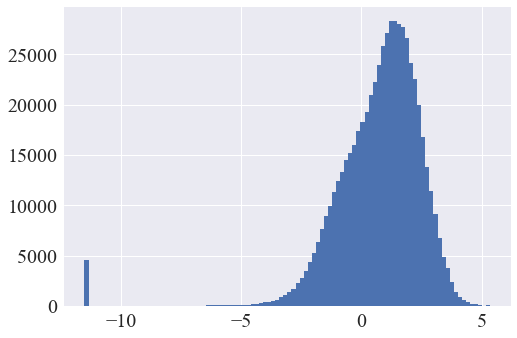

In [44]:
## wealth distribution  
wealth_dist=plt.hist(np.log(LifeCyclePop.history['aLvl'].flatten()+1e-5),bins=100)

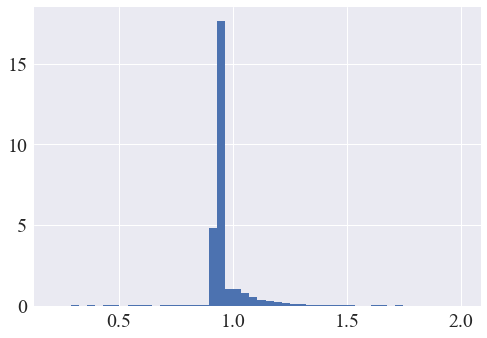

In [45]:
# Plot the distribution of growth rates of wealth between age 65 and 66 (=25 + 41)
n, bins, patches = plt.hist(aGro41NoU,50,density=True)

## Wealthy over life cycle  

In [46]:
A_life = LifeCyclePop.history['aLvl'].mean(axis=1)

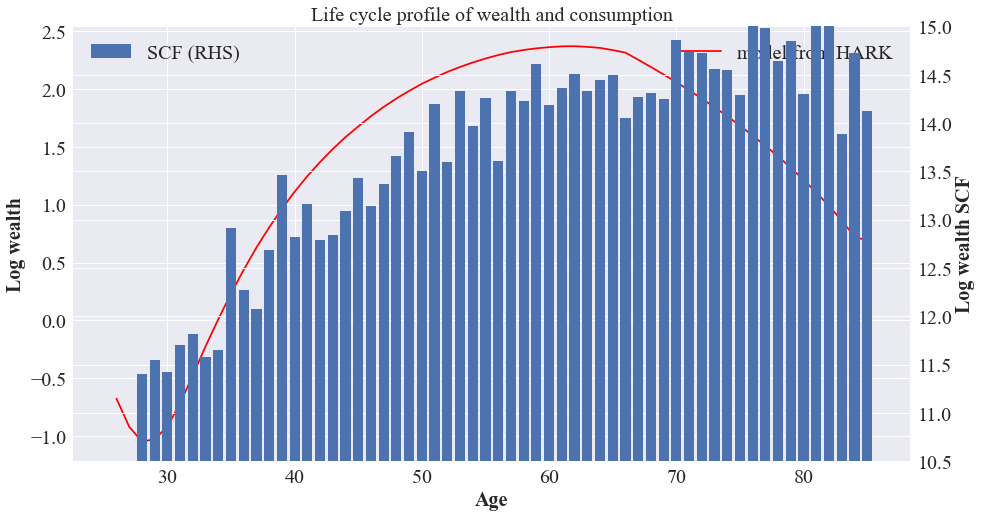

In [47]:
import pandas as pd
SCF_profile = pd.read_pickle('data/SCF_age_profile.pkl')

#SCF_profile['mv_wealth'] = SCF_profile['av_wealth'].rolling(3).mean()
## plot life cycle profile

age_lc = SCF_profile.index

fig, ax = plt.subplots(figsize=(15,8))
plt.title('Life cycle profile of wealth and consumption')
ax.plot(age_lc[1:],
        np.log(A_life),
       'r-',
       label='model from HARK')

ax2 = ax.twinx()
ax2.set_ylim([10.5,15])
ax2.bar(age_lc[1:],
        np.log(SCF_profile['av_wealth'][1:]),
       #'k--',
       label='SCF (RHS)')

ax.set_xlabel('Age')
ax.set_ylabel('Log wealth')
ax2.set_ylabel('Log wealth SCF')
ax.legend(loc=1)
ax2.legend(loc=2)